<a href="https://colab.research.google.com/github/ybq9430/ZUOYE/blob/main/source.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[k=5] 새 데이터 [[52, 42]] → 예측: Jindo dog
[k=5] 이웃 거리:
[[ 5.385  7.     8.544  8.944 10.77 ]]
[k=5] 이웃 인덱스:
[[ 6 14 12 10  8]]



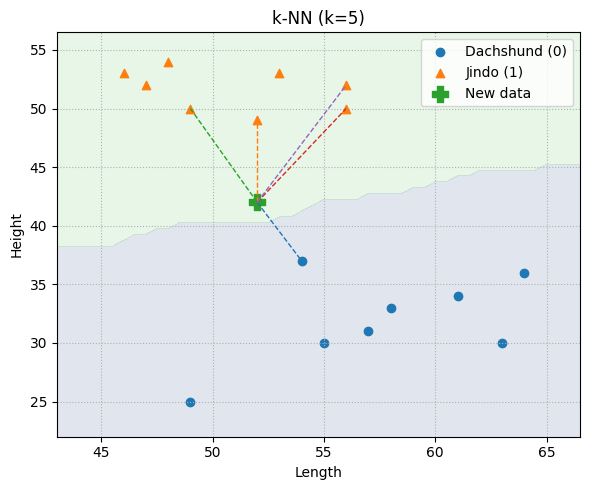

[k=9] 새 데이터 [[52, 42]] → 예측: Jindo dog
[k=9] 이웃 거리:
[[ 5.385  7.     8.544  8.944 10.77  10.817 11.045 11.18  12.042]]
[k=9] 이웃 인덱스:
[[ 6 14 12 10  8  4 13  9  7]]



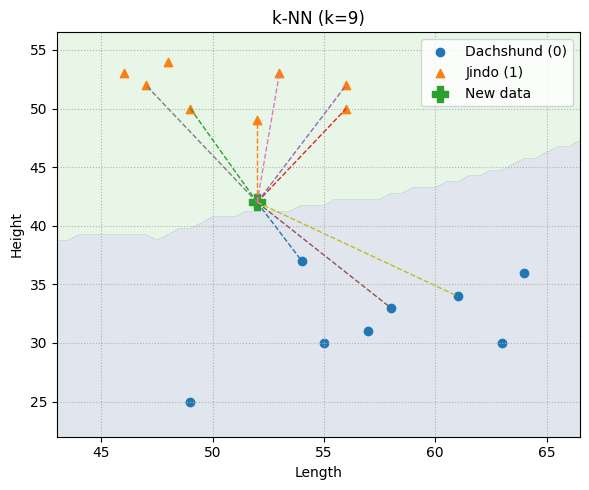

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# -------------------------
# 데이터: 닥스훈트 vs 진돗개
# -------------------------
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
jin_length  = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height  = [52, 52, 50, 53, 50, 53, 49, 54]

d_data = np.column_stack((dach_length, dach_height))
j_data = np.column_stack((jin_length,  jin_height))
d_label = np.zeros(len(d_data))  # 0: Dachshund
j_label = np.ones(len(j_data))   # 1: Jindo

X = np.concatenate((d_data, j_data))
y = np.concatenate((d_label, j_label))

new_pt = np.array([[52, 42]])    # 새 데이터 1개 (길이, 높이)
cls_name = {0: 'Dachshund', 1: 'Jindo dog'}

# -------------------------
# 유틸: 이웃선 그리기
# -------------------------
def draw_neighbor(ax, X_all, neighbor_idx, new_point):
    """새 점과 k개 이웃을 선으로 연결"""
    for idx in neighbor_idx[0]:
        x0, y0 = X_all[idx]
        ax.plot([new_point[0,0], x0], [new_point[0,1], y0], linestyle='--', linewidth=1)

# -------------------------
# (선택) 의사결정 경계 그리기
# -------------------------
def plot_decision_boundary(ax, knn, X_all, h=0.5, padding=3):
    x_min, x_max = X_all[:,0].min()-padding, X_all[:,0].max()+padding
    y_min, y_max = X_all[:,1].min()-padding, X_all[:,1].max()+padding
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # 배경 채우기(클래스 영역)
    ax.contourf(xx, yy, Z, alpha=0.15, levels=[-0.5, 0.5, 1.5])

# -------------------------
# k 값에 따라 학습/시각화
# -------------------------
def run_and_plot(k, show_boundary=True):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    pred = knn.predict(new_pt)[0]
    dists, idxs = knn.kneighbors(new_pt)

    print(f"[k={k}] 새 데이터 {new_pt.tolist()} → 예측: {cls_name[pred]}")
    print(f"[k={k}] 이웃 거리:\n{np.round(dists, 3)}")
    print(f"[k={k}] 이웃 인덱스:\n{idxs}\n")

    fig, ax = plt.subplots(figsize=(6,5))
    if show_boundary:
        plot_decision_boundary(ax, knn, X)

    # 기존 데이터 산점도
    ax.scatter(d_data[:,0], d_data[:,1], label='Dachshund (0)', marker='o')
    ax.scatter(j_data[:,0], j_data[:,1], label='Jindo (1)', marker='^')

    # 새 점 및 이웃선
    ax.scatter(new_pt[0,0], new_pt[0,1], s=120, marker='P', label='New data')
    draw_neighbor(ax, X, idxs, new_pt)

    ax.set_xlabel('Length')
    ax.set_ylabel('Height')
    ax.set_title(f'k-NN (k={k})')
    ax.legend(loc='best')
    ax.grid(True, linestyle=':')
    plt.tight_layout()
    plt.show()

# k=5와 k=9 비교
for k in (5, 9):
    run_and_plot(k, show_boundary=True)
